# <center>Project-Based Assignment CLO-1</center>

<b>Topik</b>
Implementation Queueing System in Real Problem

<b>Anggota Kelompok</b>
1. Laurentius Yudhistira Adhipratama - 1301180303
2. Muhammad Irham Naufal Al Machdi - 1301200425
3. Putri Nursyifa - 1301190058

#### **Studi Kasus**

Kali ini kami akan memodelkan antrian SPBU, data diambil dari Jurnal Optimasi Sistem Industri, Vol. 9 No.1, April 2010:31-36 (D.P. Hasian, A.K Putra). Data yang diambil merupakan data pengamatan di SPBU Gunung Pangilun untuk kendaraan roda dua, dengan dua server.

Detail tabel data: [Sheet](https://telkomuniversityofficial-my.sharepoint.com/:x:/g/personal/lyudhistira_student_telkomuniversity_ac_id/EUzDhOL6NppIv1HbDe80StkBvwI8UpOGxOmKFaIGyFI1Fw?rtime=JgFJEX3M20g)

Link sumber referensi: [Artikel](http://repo.unand.ac.id/4573/5/Simulasi%20Pelayanan%20Pengisian%20Bahan%20Bakar%20Di%20SPBU%20Gunung%20Pangilun.pdf)

#### **Ilustrasi Skema Simulasi**
Silahkan double click cell ini dan tampilkan ilustrasi dari simulasi yang akan dilakukan!

In [ ]:
# Import Library
import numpy as np
import queue
import copy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
  # Parameter Definition

  # Arrival Rate dan Service Time Rate didapat dari detail tabel data (/jam)
  arrival_rate = 11.25
  print("Arrival Rate = ", arrival_rate)
  service_rate = 120
  print("Service Rate = ", service_rate)
  rho = arrival_rate/service_rate
  print("Utilization Factor (Rho) = ", rho)

  # Lama waktu dalam simulasi
  total_time = int(input("Waktu yang ingin disimulasikan (Jam): "))

  # Inisialisasi Parameter
  qu = queue.Queue()
  curr_process = None
  arrival = []
  service = []
  waktu_arrival = []
  waktu_tunggu = []
  server_busy = False
  list_tunggu = []
  list_delay = []

  num_processes = int(np.random.poisson(arrival_rate)* total_time)
  num_processes_served = 0

Arrival Rate =  11.25
Service Rate =  120
Utilization Factor (Rho) =  0.09375
Waktu yang ingin disimulasikan (Jam): 5


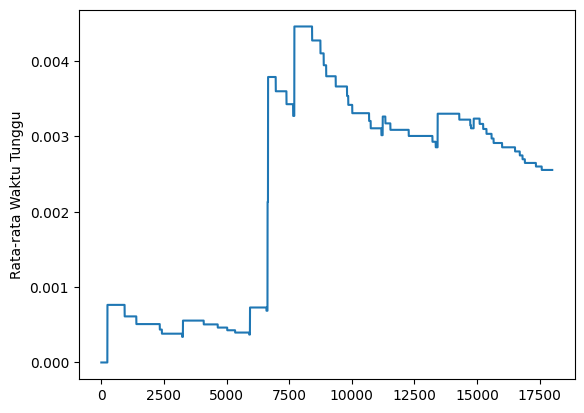

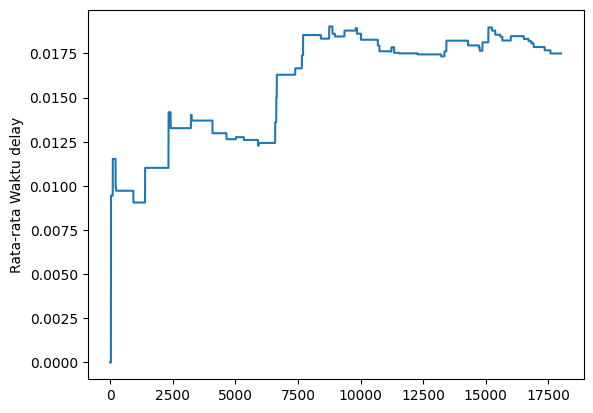

In [ ]:
# Queueing System Simulation
# Write your code here

# Merandom waktu antar kedatangan berdasarkan arrival rate (arrival)
for i in range(num_processes):
    temp = np.random.exponential(1/arrival_rate)*60*60
    if i==0:
        arrival.append(0)
    else:
        arrival.append(int(temp - temp%1))

# Merandom waktu service time berdasarkan service_rate
while not len(service) == num_processes:
    temp = np.random.exponential(1/service_rate)*60*60
    if not int(temp- temp%1)<20:
        service.append(int(temp - temp%1))

# Mengcopy array service
service_copy = copy.deepcopy(service)

# Menghitung waktu_arrival berdasarkan arrival dimulai dari t=0
# Inisiasi waktu_tunggu = 0
for i in range(num_processes):
    if i == 0:
        waktu_arrival.append(0)
    else:
        waktu_arrival.append(waktu_arrival[i-1] + arrival[i])
    waktu_tunggu.append(0)

# Simulasi M/M/1 Queue

for i in range(total_time*60*60):
    if server_busy:
        for item in list(qu.queue):
            waktu_tunggu[item] = waktu_tunggu[item] + 1
        service[curr_process] = service[curr_process] - 1
        if service[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== waktu_arrival[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True


    sum_wait = 0
    sum_delay = 0

    for i in range(num_processes_served):
        sum_wait = sum_wait + waktu_tunggu[i]
        sum_delay = sum_delay + waktu_tunggu[i] + service_copy[i]

    if num_processes_served == 0:
        list_tunggu.append(0)
        list_delay.append(0)
    else:
        list_tunggu.append(sum_wait/(num_processes_served*60*60))
        list_delay.append(sum_delay/(num_processes_served*60*60))

plt.plot([i+1 for i in range(total_time*60*60)], list_tunggu)
plt.ylabel("Rata-rata Waktu Tunggu")
plt.show()

plt.plot([i+1 for i in range(total_time*60*60)], list_delay)
plt.ylabel("Rata-rata Waktu delay")
plt.show()


In [ ]:
# Buat DataFrame untuk hasil simulasi

# Define a function to convert seconds to hours, minutes, and seconds
def convert_detik_to_jms(detik_3):
    jam_3 = detik_3 // 3600
    menit_3 = (detik_3 % 3600) // 60
    sisa_detik = detik_3 % 60
    return "{:02}:{:02}:{:02}".format(int(jam_3), int(menit_3), int(sisa_detik))

# Convert waktu_arrival to a pandas Series
waktu_arrival_series = pd.Series(waktu_arrival[:num_processes_served])

results = pd.DataFrame({
    "Process": [i + 1 for i in range(num_processes_served)],
    "Arrival Time (s)": waktu_arrival_series,
    "Arrival Time (j:m:s)": waktu_arrival_series.apply(convert_detik_to_jms),
    "Service Time (s)": service_copy[:num_processes_served],
    "Waiting Time (s)": waktu_tunggu[:num_processes_served],
    "Time in System (s)": [waktu_tunggu[i] + service_copy[i] for i in range(num_processes_served)]
})

# Simpan DataFrame ke dalam file CSV
results.to_csv('hasil_simulasi_antrian.csv', index=False)

In [ ]:
# Metric Performance Calculation
# Write your code here


rerata_time_in_system = results["Time in System (s)"].mean()

jam_2 = int(rerata_time_in_system // 3600)
menit_2 = int((rerata_time_in_system % 3600) // 60)
detik_2 = int(rerata_time_in_system % 60)
print("Rata-rata Time in System: {} jam, {} menit, {} detik".format(jam_2, menit_2, detik_2))

rerata_queue_length = arrival_rate * (rerata_time_in_system / 3600)
print("Rata-rata Queue Length: {:.2f} pelanggan".format(rerata_queue_length))

rerata_waktu_tunggu_detik = np.mean(waktu_tunggu)
jam = int(rerata_waktu_tunggu_detik // 3600)
menit = int((rerata_waktu_tunggu_detik % 3600) // 60)
detik = int(rerata_waktu_tunggu_detik % 60)

print("Average Waiting Time: {} jam, {} menit, {} detik".format(jam, menit, detik))

throughput = arrival_rate * (1 - rho)

print("Throughput: {:.2f} pelanggan per jam".format(throughput))


Rata-rata Time in System: 0 jam, 1 menit, 2 detik
Rata-rata Queue Length: 0.20 pelanggan
Average Waiting Time: 0 jam, 0 menit, 6 detik
Throughput: 10.20 pelanggan per jam


#### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!



